In [1]:
# standard python imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy

# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [2]:
data = np.load('exp_io_data\CoupledPendula_mean_in7_out7_Tmax2.0_data.npz')
for key, val in data.items():
    print(key)
    exec(key +'=val')

xlist
exp_out_list


In [3]:
x=xlist
y=exp_out_list
#print(y)

In [4]:
print(x.shape)
print(y.shape)

(2000, 14)
(2, 60, 2000, 7, 2)


In [5]:
#y1=y[0:1,29:30,:,:,0:1]
print(y.shape)

#(Nrepeat, Ntimesteps, Nx, output_dim, 2)  <-- 2 = (final position, final velocity)
#y1_np=torch.from_numpy(y1)
#y1=torch.transpose(y1_np,1,2)
#print(y1.shape)
y2=y[0:1,:,0:1000,:,0:1]
#(Nrepeat, Ntimesteps, Nx, output_dim, 2)  <-- 2 = (final position, final velocity)
y2_np=torch.from_numpy(y2)
y2=torch.transpose(y2_np,1,2)
print(y2.shape)
#print(y1.shape)

(2, 60, 2000, 7, 2)
torch.Size([1, 1000, 60, 7, 1])


In [6]:
y3=y2.squeeze(0).squeeze(3)
print(y3.shape)

torch.Size([1000, 60, 7])


In [60]:
y_train=y3[:,3:4,:]
print(y_train.shape)

torch.Size([1000, 1, 7])


In [61]:
x_train=x[0:1000,:]
print(x_train.shape)
print(x)

(1000, 14)
[[0.9515082  0.02859658 0.36347437 ... 0.35507327 0.8292224  0.4047569 ]
 [0.25135255 0.7703726  0.775273   ... 0.14982301 0.15127295 0.7362834 ]
 [0.19514024 0.16856277 0.07611024 ... 0.7874241  0.22519547 0.09913057]
 ...
 [0.47233897 0.5813042  0.5970881  ... 0.4770273  0.8321323  0.0551641 ]
 [0.9792367  0.9304237  0.7407218  ... 0.07495439 0.42210817 0.49420857]
 [0.77542037 0.6565631  0.83288056 ... 0.03630865 0.04533863 0.08364367]]


In [62]:



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.layer1 = nn.Linear(14, 14 ,bias=True)
        self.layer2 = nn.Linear(14, 14,bias=True)
        self.layer3 = nn.Linear(14, 14,bias=True)
        #self.layer4 = nn.Linear(14, 14,bias=True)
        #self.layer5 = nn.Linear(14, 14,bias=True)
        self.layer4 = nn.Linear(14, 7,bias=True)
    def forward(self, x):
        # Max pooling over a (2, 2) window
        
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = x+torch.sigmoid(self.layer1(x))
        x = x+torch.sigmoid(self.layer2(x))
        x = x+torch.sigmoid(self.layer3(x))
        #x = x+torch.sigmoid(self.layer4(x))
        #x = x+torch.sigmoid(self.layer5(x))
        x = self.layer4(x)
        #x = F.relu(self.layer4(x))
        #x = F.relu(self.layer5(x))
        #x = torch.sigmoid(self.layer6(x))
        return x


net = Net()
print(net)

Net(
  (layer1): Linear(in_features=14, out_features=14, bias=True)
  (layer2): Linear(in_features=14, out_features=14, bias=True)
  (layer3): Linear(in_features=14, out_features=14, bias=True)
  (layer4): Linear(in_features=14, out_features=7, bias=True)
)


In [44]:



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.layer1 = nn.Linear(14, 14 ,bias=True)
        self.layer2 = nn.Linear(14, 14,bias=True)
        self.layer3 = nn.Linear(14, 14,bias=True)
        #self.layer4 = nn.Linear(14, 14,bias=True)
        #self.layer5 = nn.Linear(14, 14,bias=True)
        self.layer4 = nn.Linear(14, 7,bias=True)
    def forward(self, x):
        
        
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = x+0.1*(self.layer1(x))
        x = x+0.1*(self.layer2(x))
        x = x+0.1*(self.layer3(x))
        #x = x+torch.sigmoid(self.layer4(x))
        #x = x+torch.sigmoid(self.layer5(x))
        x = self.layer4(x)
        #x = F.relu(self.layer4(x))
        #x = F.relu(self.layer5(x))
        #x = torch.sigmoid(self.layer6(x))
        return x


net = Net()
print(net)

Net(
  (layer1): Linear(in_features=14, out_features=14, bias=True)
  (layer2): Linear(in_features=14, out_features=14, bias=True)
  (layer3): Linear(in_features=14, out_features=14, bias=True)
  (layer4): Linear(in_features=14, out_features=7, bias=True)
)


In [63]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

8
torch.Size([14, 14])


In [64]:
x_data=torch.tensor(x_train)
input = x_data
out = net(input)
print(out)
print(out.shape)

tensor([[-1.2401,  0.3166,  0.5481,  ...,  0.6507, -1.3159,  0.1368],
        [-1.0592,  0.0839,  0.5240,  ...,  0.7286, -1.2597, -0.1120],
        [-1.1682,  0.0891,  0.7738,  ...,  0.5500, -1.5749, -0.0974],
        ...,
        [-1.0402,  0.0741,  0.6072,  ...,  1.0333, -1.2377, -0.0223],
        [-1.2463,  0.7494,  0.5747,  ...,  0.7068, -1.2844,  0.1368],
        [-1.4157,  0.5327,  1.0006,  ...,  0.8145, -1.8078, -0.0929]],
       grad_fn=<AddmmBackward>)
torch.Size([1000, 7])


In [65]:
net.zero_grad()
out.backward(torch.randn(1000,7))

In [66]:
target=y_train
target_new=target.view(1000,7)
print(target_new.shape)
criterion=nn.MSELoss()
loss=criterion(out,target_new)
print(loss)

torch.Size([1000, 7])
tensor(1.2326, grad_fn=<MseLossBackward>)


In [68]:
import torch.optim as optim
optimizer = torch.optim.Adam(params, lr=0.01, betas=(0.9, 0.999), eps=1e-09, weight_decay=0.1, amsgrad=False)  #adam optimizer
    
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = net(input)
    loss = criterion(output, target_new)
    loss.backward()
    optimizer.step()
    print(loss)


tensor(0.3318, grad_fn=<MseLossBackward>)
tensor(0.3578, grad_fn=<MseLossBackward>)
tensor(0.3582, grad_fn=<MseLossBackward>)
tensor(0.3391, grad_fn=<MseLossBackward>)
tensor(0.3550, grad_fn=<MseLossBackward>)
tensor(0.3543, grad_fn=<MseLossBackward>)
tensor(0.3375, grad_fn=<MseLossBackward>)
tensor(0.3307, grad_fn=<MseLossBackward>)
tensor(0.3368, grad_fn=<MseLossBackward>)
tensor(0.3427, grad_fn=<MseLossBackward>)
tensor(0.3398, grad_fn=<MseLossBackward>)
tensor(0.3332, grad_fn=<MseLossBackward>)
tensor(0.3304, grad_fn=<MseLossBackward>)
tensor(0.3327, grad_fn=<MseLossBackward>)
tensor(0.3354, grad_fn=<MseLossBackward>)
tensor(0.3348, grad_fn=<MseLossBackward>)
tensor(0.3320, grad_fn=<MseLossBackward>)
tensor(0.3299, grad_fn=<MseLossBackward>)
tensor(0.3299, grad_fn=<MseLossBackward>)
tensor(0.3309, grad_fn=<MseLossBackward>)
tensor(0.3311, grad_fn=<MseLossBackward>)
tensor(0.3301, grad_fn=<MseLossBackward>)
tensor(0.3289, grad_fn=<MseLossBackward>)
tensor(0.3285, grad_fn=<MseLossBac

In [69]:
x_test=x[1000:2000,:]
print(x_test.shape)
y1=y[0:1,:,1000:2000,:,0:1]
#(Nrepeat, Ntimesteps, Nx, output_dim, 2)  <-- 2 = (final position, final velocity)
y1_np=torch.from_numpy(y1)
y1=torch.transpose(y1_np,1,2)

(1000, 14)


In [70]:
y4=y1.squeeze(0).squeeze(3)
print(y4.shape)

y_test=y4[:,3:4,:]
print(y_test.shape)

torch.Size([1000, 60, 7])
torch.Size([1000, 1, 7])


In [71]:
x_test=torch.tensor(x_test)
test_out=net(x_test)
#LOSS = criterion(test_out, y_test)
print(test_out)
print(y_test)

tensor([[ 0.0210,  0.1126,  0.0451,  ..., -0.0061, -0.0104, -0.1499],
        [ 0.0881,  0.1543,  0.0934,  ..., -0.1083, -0.2257,  0.0484],
        [-0.1121, -0.0546, -0.1548,  ..., -0.0545,  0.0773,  0.1741],
        ...,
        [-0.0272, -0.0204, -0.0174,  ...,  0.0156, -0.0053,  0.0591],
        [ 0.2490,  0.1961,  0.1356,  ..., -0.2343,  0.1997,  0.0836],
        [ 0.2229,  0.2046,  0.2829,  ..., -0.1170,  0.0819, -0.0992]],
       grad_fn=<AddmmBackward>)
tensor([[[ 0.3560,  1.0386,  0.3677,  ...,  0.3649,  0.0780, -0.4388]],

        [[ 0.7401,  1.3101,  0.7692,  ..., -0.0033, -0.6254,  0.4717]],

        [[-0.6563, -0.2278, -0.7874,  ..., -0.2346,  0.2684,  0.6359]],

        ...,

        [[ 0.0415,  0.1389,  0.0364,  ...,  0.4750,  0.1792,  0.6742]],

        [[ 1.3797,  1.2997,  0.6255,  ..., -0.9197,  1.1616,  0.5402]],

        [[ 0.5171,  0.5964,  0.8175,  ..., -1.0062, -0.2314, -1.2184]]])


Text(0, 0.5, 'y_pred')

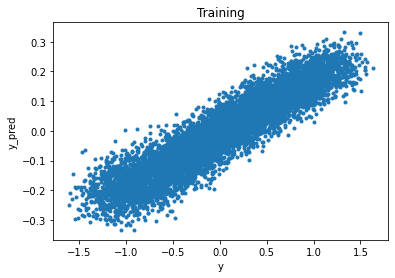

In [74]:
plt.plot(y_test.flatten(), test_out.detach().numpy().flatten(), '.')
plt.title('Training')
plt.xlabel('y')
plt.ylabel('y_pred')

In [19]:

class Net2(nn.Module):

    def __init__(self):
        super(Net2, self).__init__()

        self.layer1 = nn.Linear(14, 120)
        self.layer2 = nn.Linear(120, 120)
        self.layer3 = nn.Linear(120, 120)
        self.layer4 = nn.Linear(120, 84)
        self.layer5 = nn.Linear(84, 42)
        self.layer6 = nn.Linear(42, 7)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.layer1(x))
        x = x+F.relu(self.layer2(x))
        x = x+F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.tanh(self.layer5(x))
        x = F.relu(self.layer6(x))
        return x


net2 = Net2()
print(net2)

Net2(
  (layer1): Linear(in_features=14, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=120, bias=True)
  (layer3): Linear(in_features=120, out_features=120, bias=True)
  (layer4): Linear(in_features=120, out_features=84, bias=True)
  (layer5): Linear(in_features=84, out_features=42, bias=True)
  (layer6): Linear(in_features=42, out_features=7, bias=True)
)


params2 = list(net2.parameters())
print(len(params2))
print(params2[0].size())

In [20]:
x_data=torch.tensor(x)
input = x_data
out = net2(input)
print(out)
print(out.shape)

tensor([[0.0000, 0.1119, 0.1066,  ..., 0.1546, 0.0000, 0.0040],
        [0.0000, 0.1258, 0.0968,  ..., 0.1616, 0.0032, 0.0222],
        [0.0000, 0.1023, 0.0951,  ..., 0.1067, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0998, 0.0643,  ..., 0.1606, 0.0108, 0.0269],
        [0.0000, 0.1546, 0.1038,  ..., 0.1681, 0.0000, 0.0208],
        [0.0000, 0.1767, 0.1066,  ..., 0.1528, 0.0000, 0.0491]],
       grad_fn=<ReluBackward0>)
torch.Size([2000, 7])


C:\Users\zwdzw\anaconda3\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [21]:
target=y1[0:1000,:,:]
target_new=target.view(1000,7)

RuntimeError: shape '[1000, 7]' is invalid for input of size 42000

In [ ]:
import torch.optim as optim
optimizer = torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-06, weight_decay=0.1, amsgrad=False)  #adam optimizer
    
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = net2(input)
    loss = criterion(output, target_new)
    loss.backward()
    optimizer.step()
    print(loss)
